In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
creditos= pd.read_csv('Casocreditos.csv')

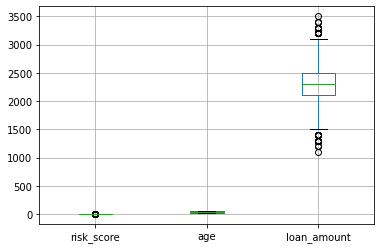

In [3]:
boxplot = creditos.boxplot(column=['risk_score','age','loan_amount'])  

<AxesSubplot:ylabel='Frequency'>

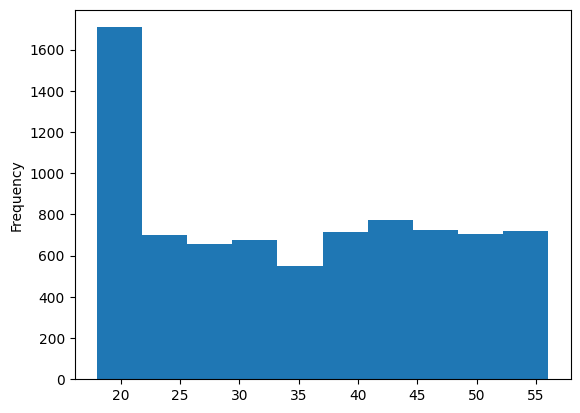

In [4]:
creditos['age'].plot(kind='hist')

**CLUSTERS**

In [5]:
iris= pd.read_csv('iris.csv')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

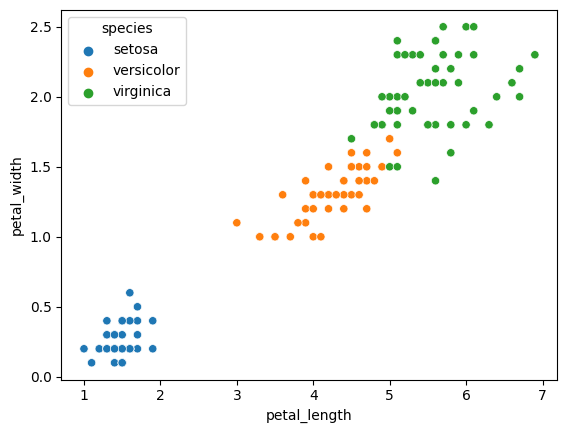

In [6]:
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species')


In [7]:
from scipy.cluster import hierarchy

In [8]:
iris_subset=iris.sample(20)
iris_subset

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
4,5.0,3.6,1.4,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
118,7.7,2.6,6.9,2.3,virginica
9,4.9,3.1,1.5,0.1,setosa
1,4.9,3.0,1.4,0.2,setosa
76,6.8,2.8,4.8,1.4,versicolor
143,6.8,3.2,5.9,2.3,virginica
137,6.4,3.1,5.5,1.8,virginica
37,4.9,3.1,1.5,0.1,setosa


In [11]:
Z=hierarchy.linkage(iris_subset.drop('species',axis=1),'ward')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [13.75, 13.75, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [72.5, 72.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [140.0, 140.0, 171.25, 171.25],
  [91.25, 91.25, 155.625, 155.625],
  [31.875, 31.875, 123.4375, 123.4375]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.20000000000000012, 0.20000000000000012, 0.0],
  [0.0, 0.3807886552931962, 0.3807886552931962, 0.20000000000000012],
  [0.0, 0.5000000000000003, 0.5000000000000003, 0.0],
  [0.3807886552931962,
   0.9582971007643366,
   0.9582971007643366,
   0.5000000000000003],
  [0.0, 0.26457513110645914, 0.26457513110645914, 0.0],
  [0.0, 0.6403124237432848, 0.640312

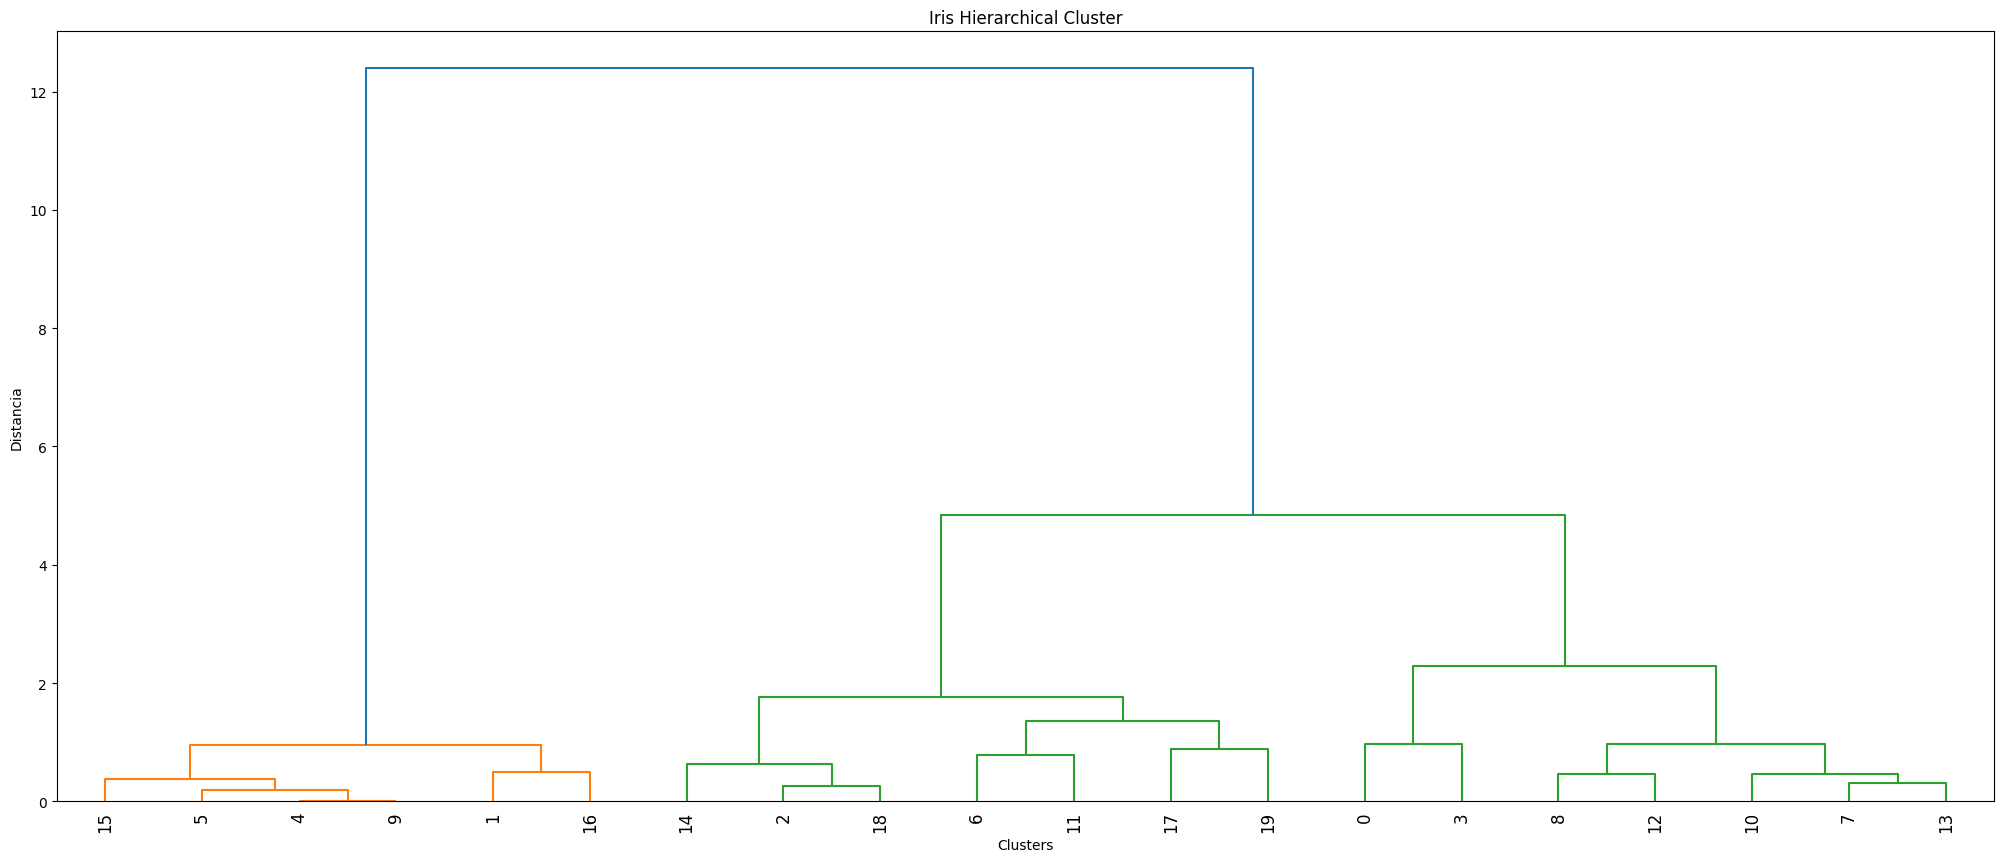

In [12]:
plt.figure(figsize=(25,10))
plt.title('Iris Hierarchical Cluster')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
hierarchy.dendrogram(Z,leaf_rotation=90)

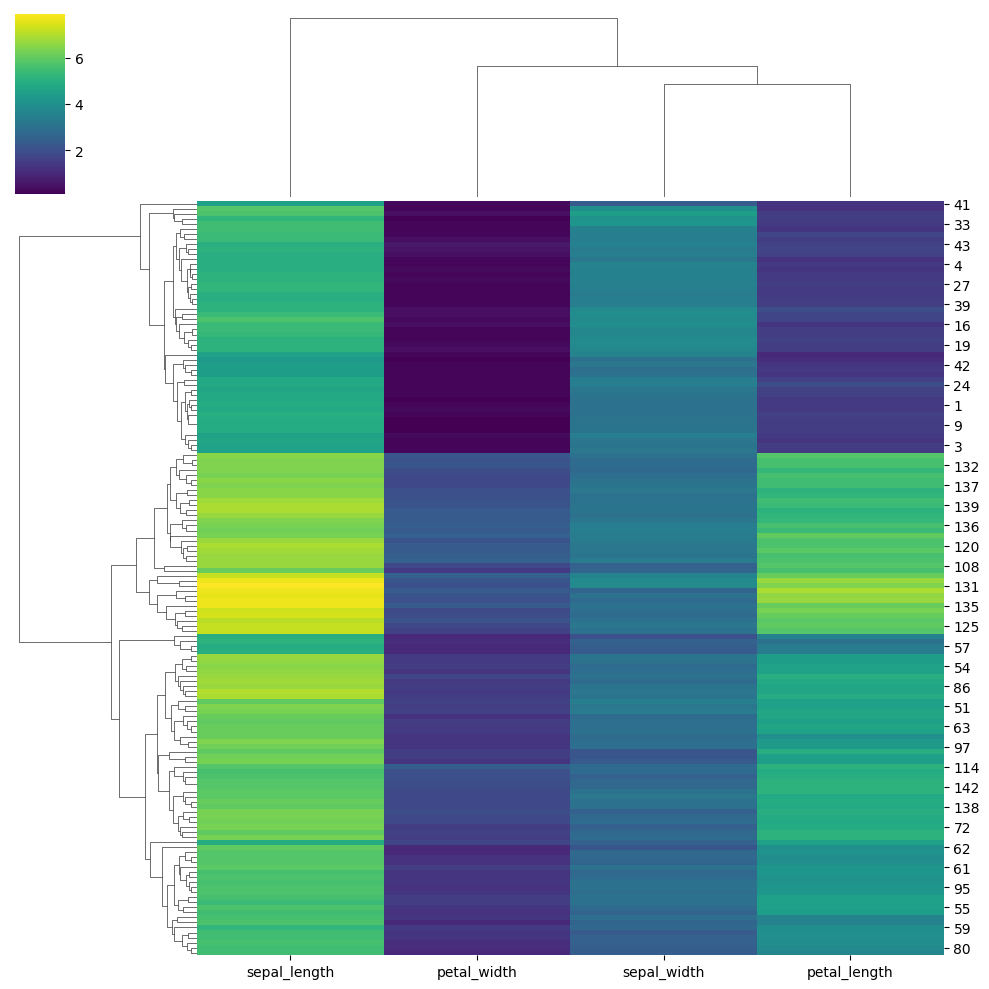

In [13]:
sns.clustermap(iris.drop('species',axis=1), cmap='viridis')

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
#Clustering aglomerativo
x=iris_subset.drop('species',axis=1)

In [20]:
hcluster=AgglomerativeClustering(n_clusters=2,
                                affinity='euclidean',
                                linkage='ward')

hcluster.fit_predict(x[['petal_length','petal_width']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
var=[1]

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

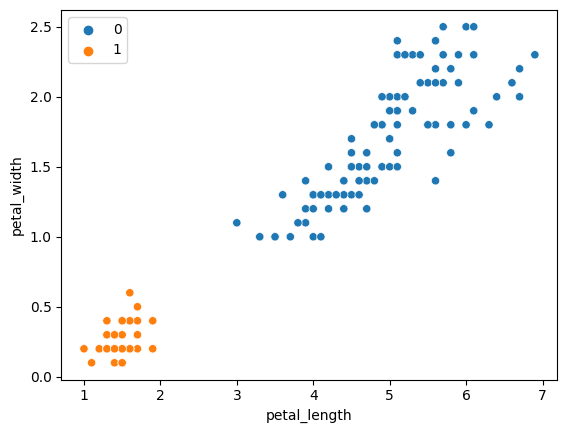

In [24]:
sns.scatterplot(data=x,
                x='petal_length',
                y='petal_width',
                hue=hcluster.fit_predict(x[['petal_length','petal_width']]))